In [49]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Morphomathematical operators

## Definitions

### Image
The image $X$ is defined as a the set of pixels, connect or not, equal to $1$ (or True), the backgound being set to $0$ (or False).

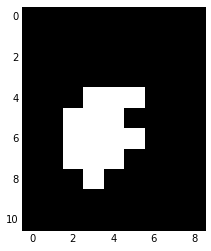

In [50]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np

X = genfromtxt('../data/morpho_x.csv', delimiter=',',filling_values=0)
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray);

### Structuring element

similarily one define a structuring element $B$ as a set of pixels (connected or not) having one origin $o$. Example of a 3x3 centered structuring element:

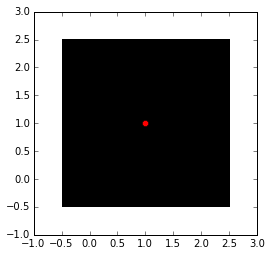

In [51]:
B = np.ones((3,3))
plt.imshow(B,interpolation='nearest',cmap=plt.cm.gray)
plt.plot(1,1,'or')
plt.gca().set_xlim(-1,3)
plt.gca().set_ylim(-1,3);

## Basic operations
### Image complement
Image complement consist in seting True pixels to false an False pixels to True, Image and background are switched.

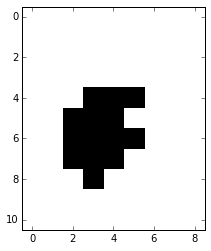

In [52]:
Xc = 1-X
plt.imshow(Xc,interpolation='nearest',cmap=plt.cm.gray);

### Symmetry

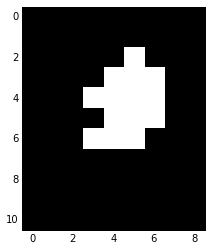

In [53]:
Xs = X[:,-1::-1][-1::-1,:]
plt.imshow(Xs,interpolation='nearest',cmap=plt.cm.gray);

### Translation
The $B_x$ structuring undergoes a 2D translation in the pixel $x = (3,5)$.

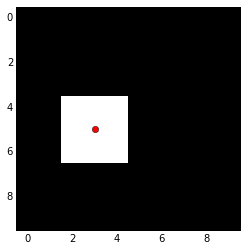

In [54]:
Bx = np.zeros((10,10))
x = (3,5)
Bx[x[1]-1:x[1]+2,x[0]-1:x[0]+2] = B
plt.plot(3,5,'or')
plt.imshow(Bx,interpolation='nearest',cmap=plt.cm.gray);

### Dilation
Dilation is defined such as:
$$X \oplus B = \{x : \hat B_x \cap X \ne \phi \}$$

### Erosion
Erosion is defined such as:
$$X \ominus B = \{x : B_x \subseteq X  \}$$

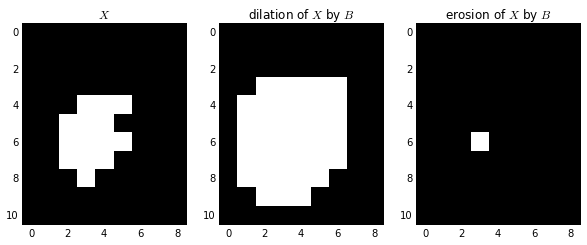

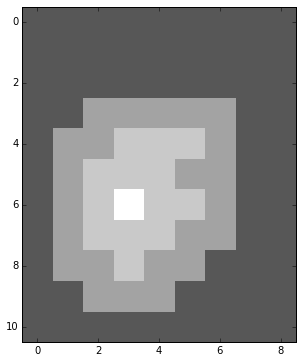

In [55]:
from skimage.morphology import disk,erosion,dilation,square
B = square(3)
X_dil = dilation(X,selem=B)
X_ero = erosion(X,selem=B)

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray)
plt.title('$X$')
plt.subplot(1,3,2)
plt.imshow(X_dil,interpolation='nearest',cmap=plt.cm.gray)
plt.title('dilation of $X$ by $B$')
plt.subplot(1,3,3)
plt.imshow(X_ero,interpolation='nearest',cmap=plt.cm.gray)
plt.title('erosion of $X$ by $B$')
plt.figure(figsize=[6,6])
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray,alpha=.3)
plt.imshow(X_ero,interpolation='nearest',cmap=plt.cm.gray,alpha=.3)
plt.imshow(X_dil,interpolation='nearest',cmap=plt.cm.gray,alpha=.3);

## Combined operations
More complex operation can be achieved by combining two ore more basis operators, the simplest ones are the opening and the closing.


### Opening
Opening consist in applying in succession one erosion followed by one dilation, both using a same structuring element.

Opening 'opens' small gaps existing in the shape.


### Closing
Opening consist in applying in succession one dilation followed by one erosion, both using a same structuring element.

Closing 'closes' the gaps present in the shape.

Opening and closing are illustrated below with a 3x3 square structuring element $B$:

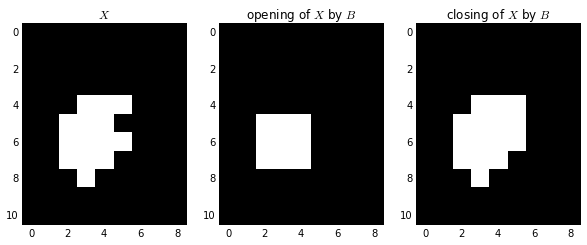

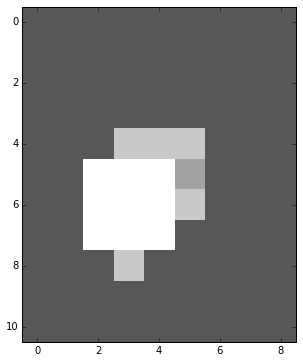

In [56]:
B = square(3)
X_dil = dilation(X,selem=B)
X_ero = erosion(X,selem=B)

X_open = dilation(X_ero,selem=B)
X_close = erosion(X_dil,selem=B)

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray)
plt.title('$X$')
plt.subplot(1,3,2)
plt.imshow(X_open,interpolation='nearest',cmap=plt.cm.gray)
plt.title('opening of $X$ by $B$')
plt.subplot(1,3,3)
plt.imshow(X_close,interpolation='nearest',cmap=plt.cm.gray)
plt.title('closing of $X$ by $B$')
plt.figure(figsize=[6,6])
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray,alpha=.3)
plt.imshow(X_open,interpolation='nearest',cmap=plt.cm.gray,alpha=.3)
plt.imshow(X_close,interpolation='nearest',cmap=plt.cm.gray,alpha=.3);

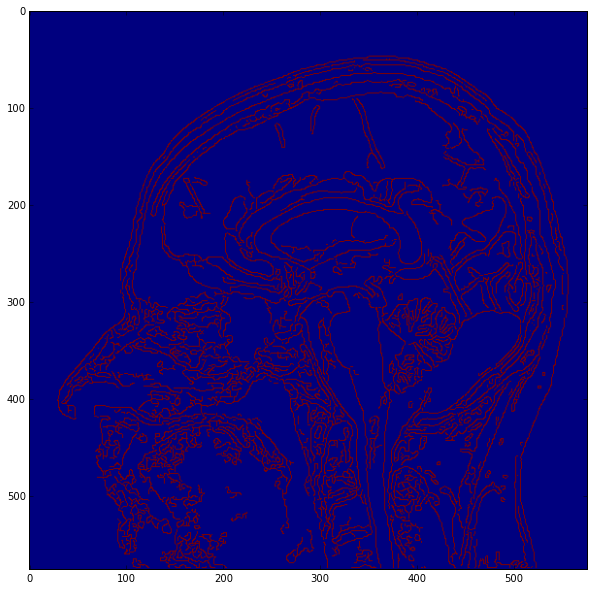

In [61]:
from skimage.io import imread
from skimage.filters import gaussian_filter
from skimage import feature

ct = imread('https://upload.wikimedia.org/wikipedia/commons/5/5f/MRI_EGC_sagittal.png')
canny = feature.canny(ct[:,:,0],low_threshold=.1*255,high_threshold=.4*255)

plt.figure(figsize=[10,10])
plt.imshow(canny)

### The Hit-or-Miss transform

## The gray level morphology
### Erosion
### Dilation

>see also:
* Morphological algorithms [MMIP](../00-Preface/06-References.ipynb#[MMIP]) p255-288